In [ ]:
import os
import glob
import numpy as np
from collections import Counter

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras_preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from keras.models import  Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D, BatchNormalization, Concatenate
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv1D, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.models import model_from_json
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

In [ ]:
from tensorflow.keras.applications import ResNet50
#Load the ResNet50 model
ResNet50_conv = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

for layer in ResNet50_conv.layers:
    layer.trainable = True

# Check the trainable status of the individual layers
for layer in ResNet50_conv.layers:
    print(layer, layer.trainable)

# Create the model
model = models.Sequential()
# Add the vgg convolutional base model
model.add(ResNet50_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(15, activation='sigmoid'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

<keras.engine.input_layer.InputLayer object at 0x7f5d411300d0> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7f5d4d886950> True
<keras.layers.convolutional.Conv2D object at 0x7f5d4d886c10> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f5d4d8864d0> True
<keras.layers.core.Activation object at 0x7f5d44b957d0> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7f5d448b4450> True
<keras.layers.pooling.MaxPooling2D object at 0x7f5d4959d490> True
<keras.layers.convolutional.Conv2D object at 0x7f5d44b40650> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f5d44ae0d10> True
<keras.layers.core.Activation object at 0x7f5d44ae0810> True
<keras.layers.convolutional.Conv2D object at 0x7f5d4d8701d0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f5d44ae0fd0> True
<keras.layers.core.Activation object at 0x7f5d44af2bd0> True
<keras.layers.convolutional.Conv2D object at 

In [ ]:
 # Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-7)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/mfcc/train/',
                                                 target_size = (64, 64),
                                                 shuffle=True)

Found 9519 images belonging to 15 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/mfcc/test/',
                                            target_size = (64, 64))

Found 2107 images belonging to 15 classes.


In [ ]:
model_history = model.fit(training_set, batch_size=16, epochs=10, verbose=1, validation_data=(test_set))

Epoch 1/10
298/298 [==============================] - 2009s 7s/step - loss: 2.1373 - accuracy: 0.3581 - val_loss: 3.1788 - val_accuracy: 0.1367
Epoch 2/10
298/298 [==============================] - 1524s 5s/step - loss: 1.5807 - accuracy: 0.5202 - val_loss: 4.6497 - val_accuracy: 0.1267
Epoch 3/10
298/298 [==============================] - 1519s 5s/step - loss: 1.2663 - accuracy: 0.6103 - val_loss: 2.2707 - val_accuracy: 0.3374
Epoch 4/10
298/298 [==============================] - 1520s 5s/step - loss: 1.0599 - accuracy: 0.6753 - val_loss: 1.9347 - val_accuracy: 0.4770
Epoch 5/10
298/298 [==============================] - 1535s 5s/step - loss: 0.8925 - accuracy: 0.7255 - val_loss: 1.9091 - val_accuracy: 0.4827
Epoch 6/10
298/298 [==============================] - 1511s 5s/step - loss: 0.7511 - accuracy: 0.7745 - val_loss: 3.5080 - val_accuracy: 0.3536
Epoch 7/10
298/298 [==============================] - 1524s 5s/step - loss: 0.6613 - accuracy: 0.7922 - val_loss: 1.7580 - val_accuracy:

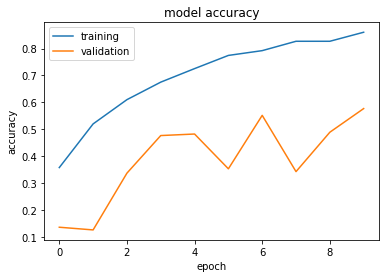

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

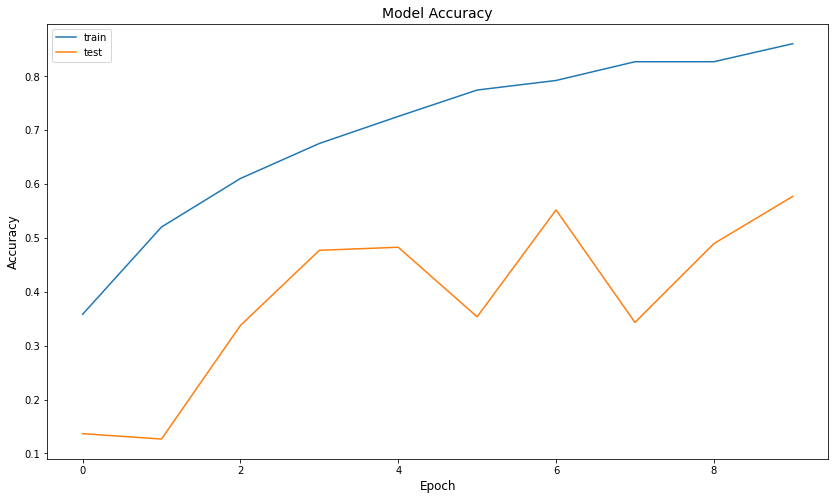

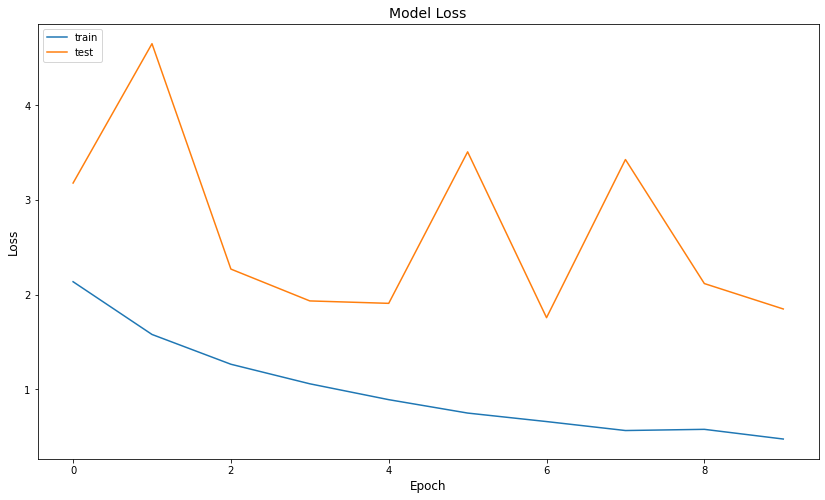

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_history = model.fit(training_set, batch_size=16, epochs=5, verbose=1, validation_data=(test_set))

Epoch 1/5
298/298 [==============================] - 1554s 5s/step - loss: 2.3744 - accuracy: 0.3351 - val_loss: 3.5485 - val_accuracy: 0.1367
Epoch 2/5
298/298 [==============================] - 1537s 5s/step - loss: 1.6813 - accuracy: 0.4907 - val_loss: 2.9037 - val_accuracy: 0.0902
Epoch 3/5
298/298 [==============================] - 1546s 5s/step - loss: 1.3788 - accuracy: 0.5722 - val_loss: 2.8949 - val_accuracy: 0.1471
Epoch 4/5
298/298 [==============================] - 1529s 5s/step - loss: 1.1634 - accuracy: 0.6458 - val_loss: 1.8641 - val_accuracy: 0.4732
Epoch 5/5
298/298 [==============================] - 1536s 5s/step - loss: 1.0026 - accuracy: 0.6939 - val_loss: 2.5885 - val_accuracy: 0.3868
